# Setup 

In [1]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from sympy import *
import time
from IPython import display
import pylab as pl


## Getting the derivative of the MSE



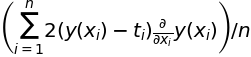

In [2]:
n, i = symbols('n i')
xi = Indexed('x', i)
ti = Indexed('t', i)
yf = Function('y')
init_printing(use_unicode=True)

MSE = (1/n) * Sum((yf(xi)-ti)**2, (i,1,n))
diff(MSE,xi)

## Helper functions

In [3]:
def insert_noise(points):
  noise = np.random.normal(scale=3,size=len(points))
  return points + noise

def calculate_mse(x,y,f, slope):
  sum_err = 0
  for xi, yi in zip(x,y):
    sum_err += (f(xi, slope)-yi)**2
  return sum_err / len(x)

def calculate_mse_derivative(x,y,f, slope):
  #y(x) = mx
  #y'(x) = m
  sum_err = 0
  for xi, yi in zip(x,y):
    sum_err +=  slope * (f(xi, slope) - yi)  # * 2 - acting little strange 
  return  sum_err /   (len(x)) 

def linear_predictation(x, theta):
  #y=mx
  return theta * x


def plot_demo(x, y, pred, mse):
  plt.rcParams["figure.figsize"] = (13,8)
  plt.scatter(x,y,s=5)
  plt.grid()
  plt.axis([0,100,min(y),100])
  plt.plot(x, pred , "+-r")
  plt.title(f"MSE: %.2f" % mse)
  for xi, yi, pi in zip(x,y,pred):
    plt.plot([xi,xi],[yi,pi], "g")
  plt.show()

## Generate random data

In [4]:
slope = 0.2

x = np.arange(100)
y = np.arange(0,np.floor(100*slope),slope)
y = insert_noise(y)

## Animation of the linear regression
It's a VERY basic linear regression (only one param)

### Before animation & Training


In [5]:
start_slope = 1
iterations = 20
alpha = 0.01
pred = np.arange(100)

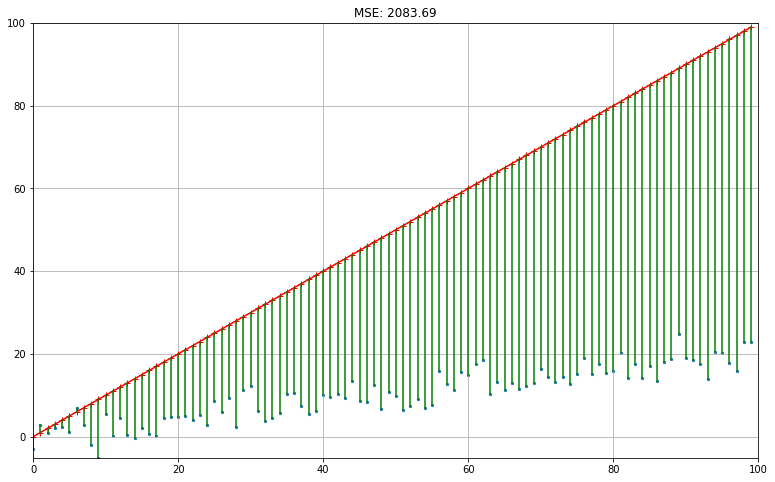

In [6]:
err = calculate_mse(x,y,linear_predictation, start_slope)
plot_demo(x,y, linear_predictation(x, start_slope), err)

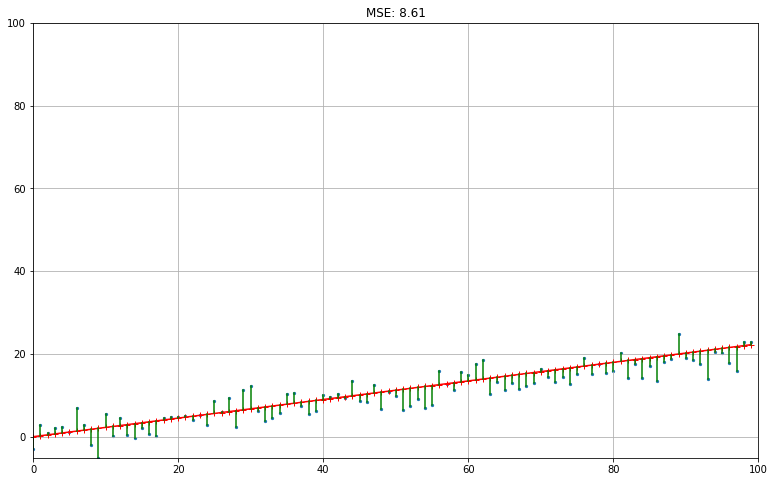

In [7]:
%matplotlib inline


err_arr = []
for i in range(iterations):
  err = calculate_mse(x,y,linear_predictation, start_slope)
  display.clear_output(wait=True)
  plot_demo(x,y, linear_predictation(x, start_slope), err)
  err_arr.append(err)
  delta = calculate_mse_derivative(x,y,linear_predictation, start_slope) * alpha
  start_slope -= delta
  time.sleep(.5)



## Error graph
the MSE for every iteration

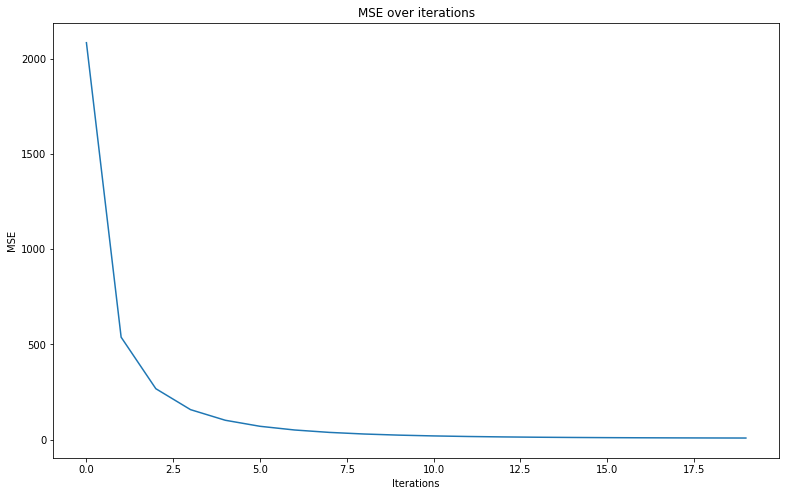

In [8]:
err_arr = np.array(err_arr)
plt.plot(np.arange(iterations), err_arr)
plt.title("MSE over iterations")
plt.ylabel("MSE")
plt.xlabel("Iterations")
plt.show()